In [10]:
import numpy as np
import polars as pl

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [25]:
df = pl.read_csv("SMARTc.csv", separator=";", ignore_errors=True)
df = df.drop("TEVENT")
df

EVENT,SEX,AGE,DIABETES,CEREBRAL,CARDIAC,AAA,PERIPH,STENOSIS,SYSTBP,DIASTBP,SYSTH,DIASTH,LENGTH,WEIGHT,BMI,CHOL,HDL,LDL,TRIG,HOMOC,GLUT,CREAT,IMT,albumin,SMOKING,packyrs,alcohol,HISTCARD,HISTCAR2
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,f64,f64,f64,f64,f64,f64,i64,f64,i64,i64,f64,i64,i64,i64
0,1,71,1,0,1,0,1,0,185,86,162,69,1.7,69,23.88,6.0,0.94,4.03,2.29,11.7,6.3,95,0.82,1,2,22.5,3,2,2
0,2,46,0,0,0,0,1,0,135,82,132,91,1.72,71,24.0,4.0,1.26,2.23,1.13,8.7,4.7,66,0.57,1,1,0.0,1,1,1
0,1,59,0,0,1,0,1,0,149,97,144,99,1.77,82,26.17,4.9,1.28,3.17,1.01,13.3,6.1,93,0.83,1,2,33.3,3,2,2
1,1,76,0,0,1,1,1,0,140,74,140,76,1.82,98,29.59,5.3,1.0,3.4,2.01,10.5,5.0,79,1.45,2,2,49.0,3,3,4
0,1,57,0,0,1,0,1,0,177,96,143,81,1.9,107,29.64,5.2,0.81,2.26,4.76,10.8,6.1,91,1.07,1,2,53.2,3,2,2
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,1,57,1,0,1,0,0,0,125,82,137,77,1.69,89,31.16,4.4,0.94,1.1,5.65,18.6,6.6,85,0.63,2,2,3.3,3,1,1
0,2,58,0,1,0,0,0,0,147,88,147,84,1.6,80,31.25,4.6,1.62,2.45,1.17,12.1,6.0,66,1.05,2,3,12.1,3,1,1
0,1,44,0,0,1,0,0,0,131,77,137,84,1.6,75,29.3,4.9,0.96,2.84,2.44,7.8,6.1,80,0.86,1,2,39.2,3,1,1


In [26]:
# Event is the target column
y = df["EVENT"].to_numpy()
X = df.drop("EVENT").to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

print(clf.score(X_test, y_test))

0.8980645161290323


In [27]:
# print specs of the model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

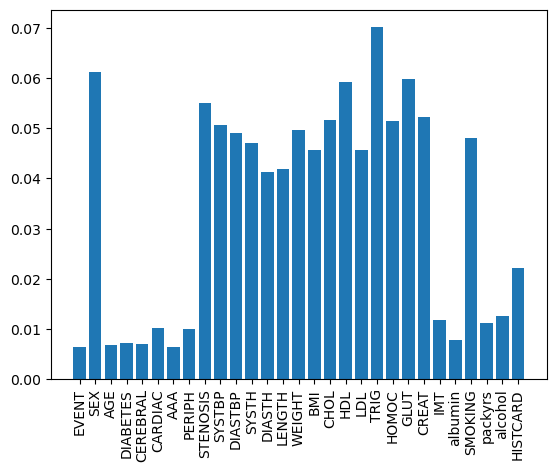

In [40]:
# Plot feature importance
import matplotlib.pyplot as plt

plt.bar(df.columns[:-1], clf.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [35]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,